In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import shallow_nn

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


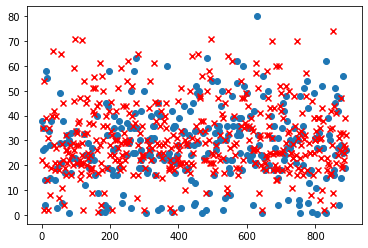

In [4]:
plt.scatter(train_data[train_data.Survived == 1]["PassengerId"], train_data[train_data.Survived == 1]["Age"], marker="o")

plt.scatter(train_data[train_data.Survived == 0]["PassengerId"], train_data[train_data.Survived == 0]["Age"], marker="x", color="red")

In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [7]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

y = np.array([y]).T
X = np.array(X)

X_train = X[:(int(len(X)*0.75)), :].T
X_val = X[(int(len(X)*0.75)):, :].T
y_train = y[:(int(len(X)*0.75)), :].T
y_val = y[(int(len(X)*0.75)):, :].T
X_test = np.array(X_test).T

In [14]:
model = shallow_nn.model(X_train, y_train, X_val, y_val, n_h = 10, learning_rate=0.1, print_cost = True)

Cost after iteration 0: 0.693078
Cost after iteration 100: 0.647370
Cost after iteration 200: 0.516867
Cost after iteration 300: 0.475751
Cost after iteration 400: 0.466515
Cost after iteration 500: 0.462681
Cost after iteration 600: 0.460399
Cost after iteration 700: 0.458637
Cost after iteration 800: 0.457203
Cost after iteration 900: 0.456048
Cost after iteration 1000: 0.455108
Cost after iteration 1100: 0.454317
Cost after iteration 1200: 0.453619
Cost after iteration 1300: 0.452980
Cost after iteration 1400: 0.452389
Cost after iteration 1500: 0.451839
Cost after iteration 1600: 0.451320
Cost after iteration 1700: 0.450820
Cost after iteration 1800: 0.450328
Cost after iteration 1900: 0.449840
train accuracy: 80.23952095808383 %
test accuracy: 82.0627802690583 %


In [15]:
predictions = np.squeeze(shallow_nn.predict(model["parameters"], X_test))


output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [10]:
output.shape

(418, 2)